In [50]:
# Librerías para manipulación de datos
import pandas as pd
import numpy as np

# Librerías de machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Leer archivo CSV
dataset = pd.read_csv('C:/Users/user/Desktop/Practica Python/CBC data_for_meandeley_csv_01052023.csv')

dataset.head()

,S. No.,Age,Sex,RBC,PCV,MCV,MCH,MCHC,RDW,TLC,PLT /mm3,HGB
0,1,28,0,5.66,34.0,60.1,17.0,28.2,20.0,11.10,128.3,9.6
1,2,41,0,4.78,44.5,93.1,28.9,31.0,13.0,7.02,419.0,13.8
2,3,40,1,4.65,41.6,89.5,28.8,32.2,13.0,8.09,325.0,13.4
3,4,76,0,4.24,36.7,86.6,26.7,30.8,14.9,13.41,264.0,11.3
4,5,20,1,4.14,36.9,89.1,27.8,31.2,13.2,4.75,196.0,11.5


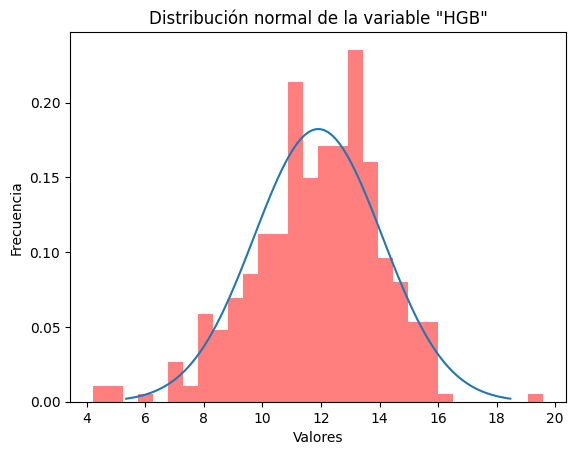

In [3]:
# Calcular estadísticas descriptivas de globulos 
media = dataset['HGB'].mean()
mediana = dataset['HGB'].median()
moda = dataset['HGB'].mode()[0] # se utiliza [0] para obtener el primer valor de la serie
desviacion = dataset['HGB'].std()

# Generar gráfico de distribución normal
mu, sigma = media, desviacion
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2)))
plt.title('Distribución normal de la variable "HGB"')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.hist(dataset['HGB'], bins=30, density=True, alpha=0.5, color='red')
plt.show()

In [4]:
data_to_plot = ['RBC', 'PCV', 'MCV', 'MCH', 'MCHC', 'RDW', 'TLC', 'PLT /mm3', 'HGB']
# RBC Número de glóbulos rojos Células/mcL
# PCV Volumen de glóbulos rojos empaquetados %
# MCV Volumen corpuscular medio fL
# MCH Hemoglobina corpuscular media pg
# MCHC Concentración de hemoglobina corpuscular media g/dL
# RDW Ancho de distribución de los glóbulos rojos %
# TLC Recuento total de leucocitos Células/mcL
# PLT Recuento de plaquetas	/mm³
# HGB Hemoglobina g/dL

In [5]:
# Crear una copia del dataset original
dataset_copy = dataset.copy()

# Ver las columnas principales (nombres de las columnas)
print(dataset_copy.columns)

Index(['S. No.', 'Age', 'Sex', 'RBC', 'PCV', 'MCV', 'MCH', 'MCHC', 'RDW',
       'TLC', 'PLT /mm3', 'HGB'],
      dtype='object')


In [6]:
# Obtener estadísticas descriptivas para todas las variables numéricas
descripcion = dataset_copy.describe()

# Mostrar las estadísticas descriptivas
print(descripcion)

           S. No.         Age         Sex         RBC         PCV         MCV  \
count  364.000000  364.000000  364.000000  364.000000  364.000000  364.000000   
mean   182.500000   44.917582    0.442308    4.278736   36.762912   87.509121   
std    105.221988   18.780854    0.497344    0.820166    6.830835    9.332164   
min      1.000000   11.000000    0.000000    1.360000   13.100000   55.700000   
25%     91.750000   28.000000    0.000000    3.780000   32.900000   83.175000   
50%    182.500000   44.500000    0.000000    4.335000   36.800000   87.950000   
75%    273.250000   60.000000    1.000000    4.800000   41.850000   91.875000   
max    364.000000   89.000000    1.000000    6.900000   56.900000  124.100000   

              MCH        MCHC         RDW         TLC    PLT /mm3         HGB  
count  364.000000  364.000000  364.000000  364.000000  364.000000  364.000000  
mean    28.227143   32.053407   15.116511    8.863571  223.750824   11.907692  
std      3.865998    2.801790 

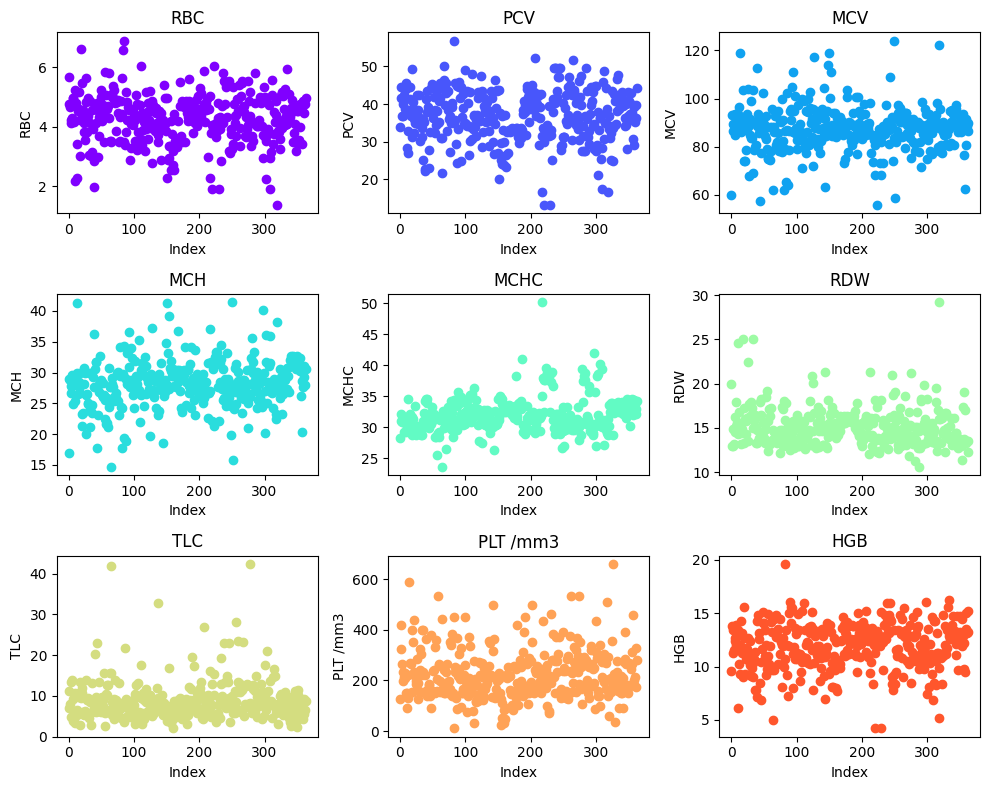

In [7]:
# Crear un diagrama de dispersión para cada par de columnas
plt.figure(figsize=(10, 8))

for i, column in enumerate(data_to_plot):
    # Crear subplots para las columnas
    plt.subplot(3, 3, i + 1)  # 3 filas, 3 columnas, en la posición (i+1)
    
    # Diagrama de dispersión
    plt.scatter(dataset_copy.index, dataset_copy[column], label=column, color=plt.cm.rainbow(i / len(data_to_plot)))
    
    # Agregar títulos y etiquetas
    plt.title(column)
    plt.xlabel('Index')
    plt.ylabel(column)

# Ajustar el diseño de los subplots
plt.tight_layout()
plt.show()

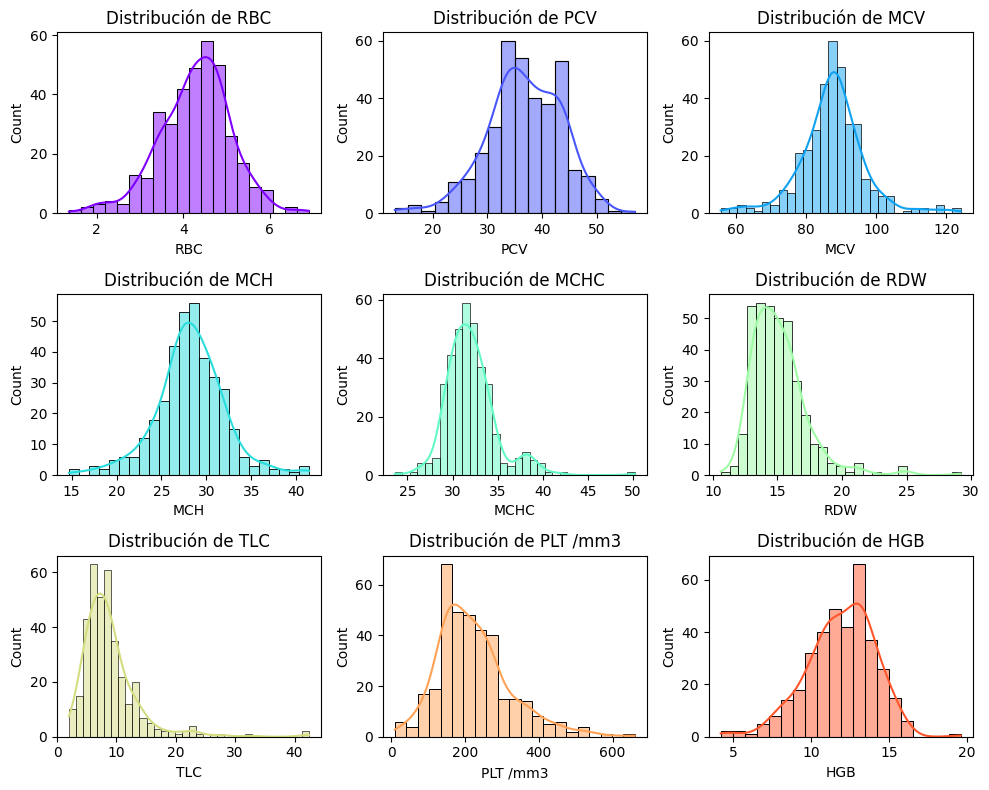

In [8]:
# Crear la figura para los subplots
plt.figure(figsize=(10, 8))

# Ciclo para graficar las distribuciones normales
for i, column in enumerate(data_to_plot):
    plt.subplot(3, 3, i + 1)
    
    # Graficar las distribuciones normales (histograma + KDE) con colores diferentes
    sns.histplot(dataset_copy[column], kde=True, color=plt.cm.rainbow(i / len(data_to_plot)))
    
    # Título para cada subplot
    plt.title(f'Distribución de {column}')
    
# Ajustar el diseño de los subplots
plt.tight_layout()
plt.show()

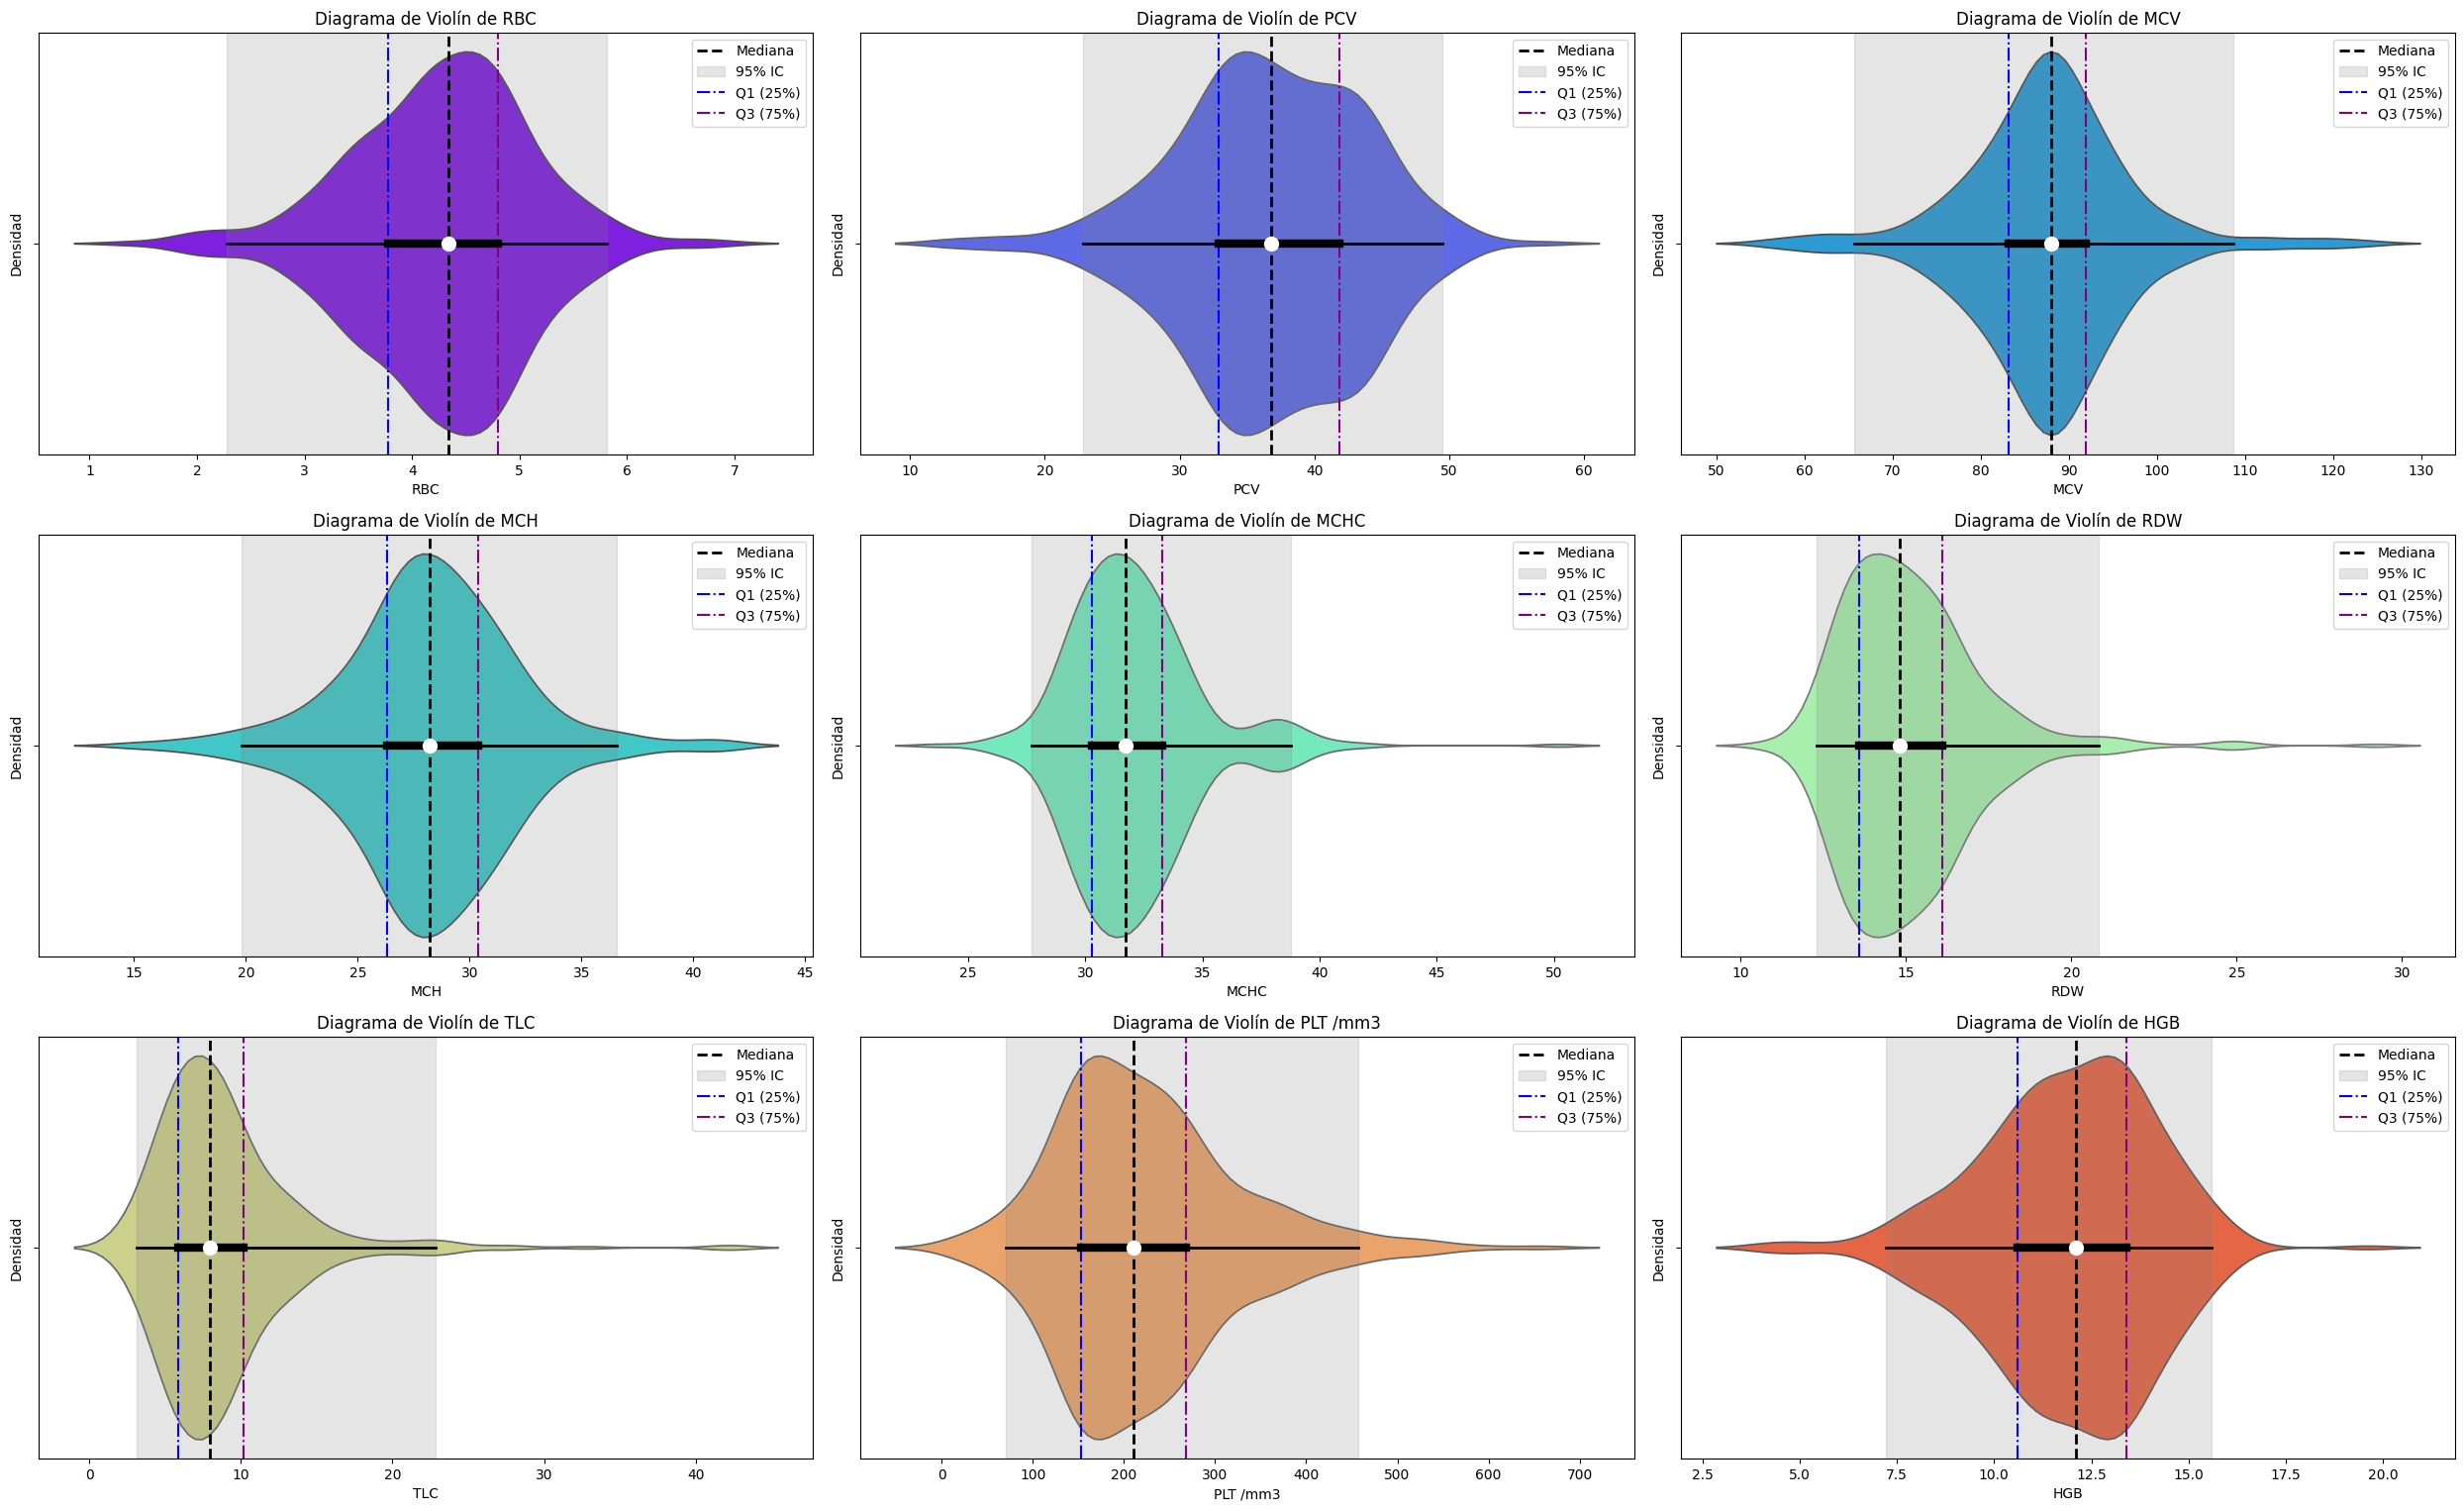

In [9]:
# Configurar el tamaño de la figura
plt.figure(figsize=(25, 20))

# Crear un diagrama de violín para cada columna con un color diferente
for i, col in enumerate(data_to_plot):
    plt.subplot(4, 3, i + 1)  # Crear una grilla de 4x3 para los gráficos
    
    # Usar paleta rainbow para los colores
    color = plt.cm.rainbow(i / len(data_to_plot))
    
    # Crear diagrama de violín sin cuartiles internos para personalizar
    sns.violinplot(data=dataset_copy, x=col, color=color, inner=None)  
    
    # Calcular estadísticas
    col_data = dataset[col].dropna()  # Asegurarse de que no haya valores NaN
    median = np.median(col_data)
    q1 = np.percentile(col_data, 25)  # Primer cuartil
    q3 = np.percentile(col_data, 75)  # Tercer cuartil
    iqr = q3 - q1  # Rango intercuartílico
    ci_lower = np.percentile(col_data, 2.5)  # Límite inferior del 95% IC
    ci_upper = np.percentile(col_data, 97.5)  # Límite superior del 95% IC

    # Agregar la mediana, el rango intercuartílico y el intervalo de confianza
    plt.axvline(median, color='black', linestyle='--', linewidth=2, label='Mediana')
    plt.axvspan(ci_lower, ci_upper, color='gray', alpha=0.2, label='95% IC')
    plt.axvline(q1, color='blue', linestyle='-.', linewidth=1.5, label='Q1 (25%)')
    plt.axvline(q3, color='purple', linestyle='-.', linewidth=1.5, label='Q3 (75%)')
    
    # Añadir línea negra gruesa para el IQR
    plt.plot([q1, q3], [0, 0], color='black', linewidth=6, zorder=3)  # Barra gruesa para el IQR
    
    # Añadir línea negra fina para el intervalo de confianza del 95%
    plt.plot([ci_lower, ci_upper], [0, 0], color='black', linewidth=2, zorder=2)  # Barra fina para el 95% IC
    
    # Añadir el punto blanco para la mediana
    plt.scatter([median], [0], color='white', s=100, zorder=4)  # Punto blanco para la mediana
    
    plt.title(f'Diagrama de Violín de {col}')
    plt.xlabel(col)
    plt.ylabel('Densidad')
    plt.legend()  # Mostrar la leyenda para identificar las estadísticas

# Ajustar el espacio entre los gráficos
plt.tight_layout()
plt.show()

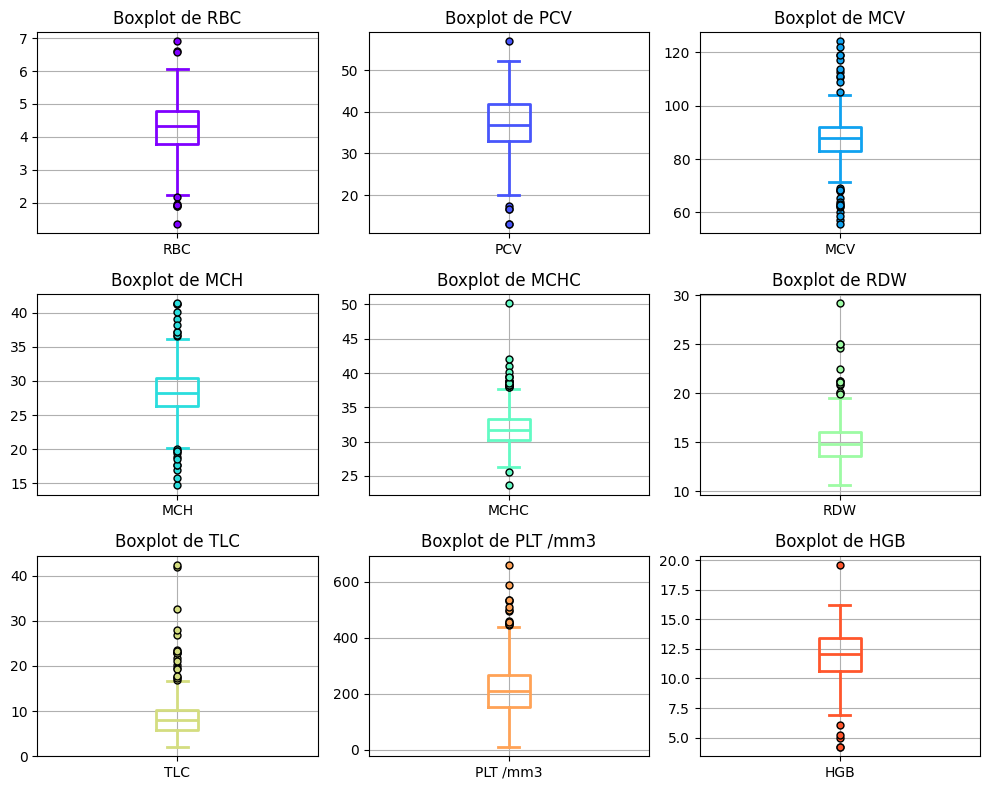

In [10]:
# Configurar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Crear un boxplot para cada columna con un color diferente de la paleta rainbow
for i, col in enumerate(data_to_plot):
    plt.subplot(3, 3, i + 1)  # Crear una grilla de 3x3 para los gráficos
    color = plt.cm.rainbow(i / len(data_to_plot))  # Usar paleta rainbow
    
    # Crear el boxplot
    dataset.boxplot(column=[col], 
                    boxprops=dict(color=color, linewidth=2), 
                    whiskerprops=dict(color=color, linewidth=2), 
                    capprops=dict(color=color, linewidth=2), 
                    medianprops=dict(color=color, linewidth=2), 
                    flierprops=dict(markerfacecolor=color, marker='o', markersize=5))  # Definir color y grosor para cada elemento
    plt.title(f'Boxplot de {col}')

# Ajustar el espacio entre los gráficos
plt.tight_layout()
plt.show()

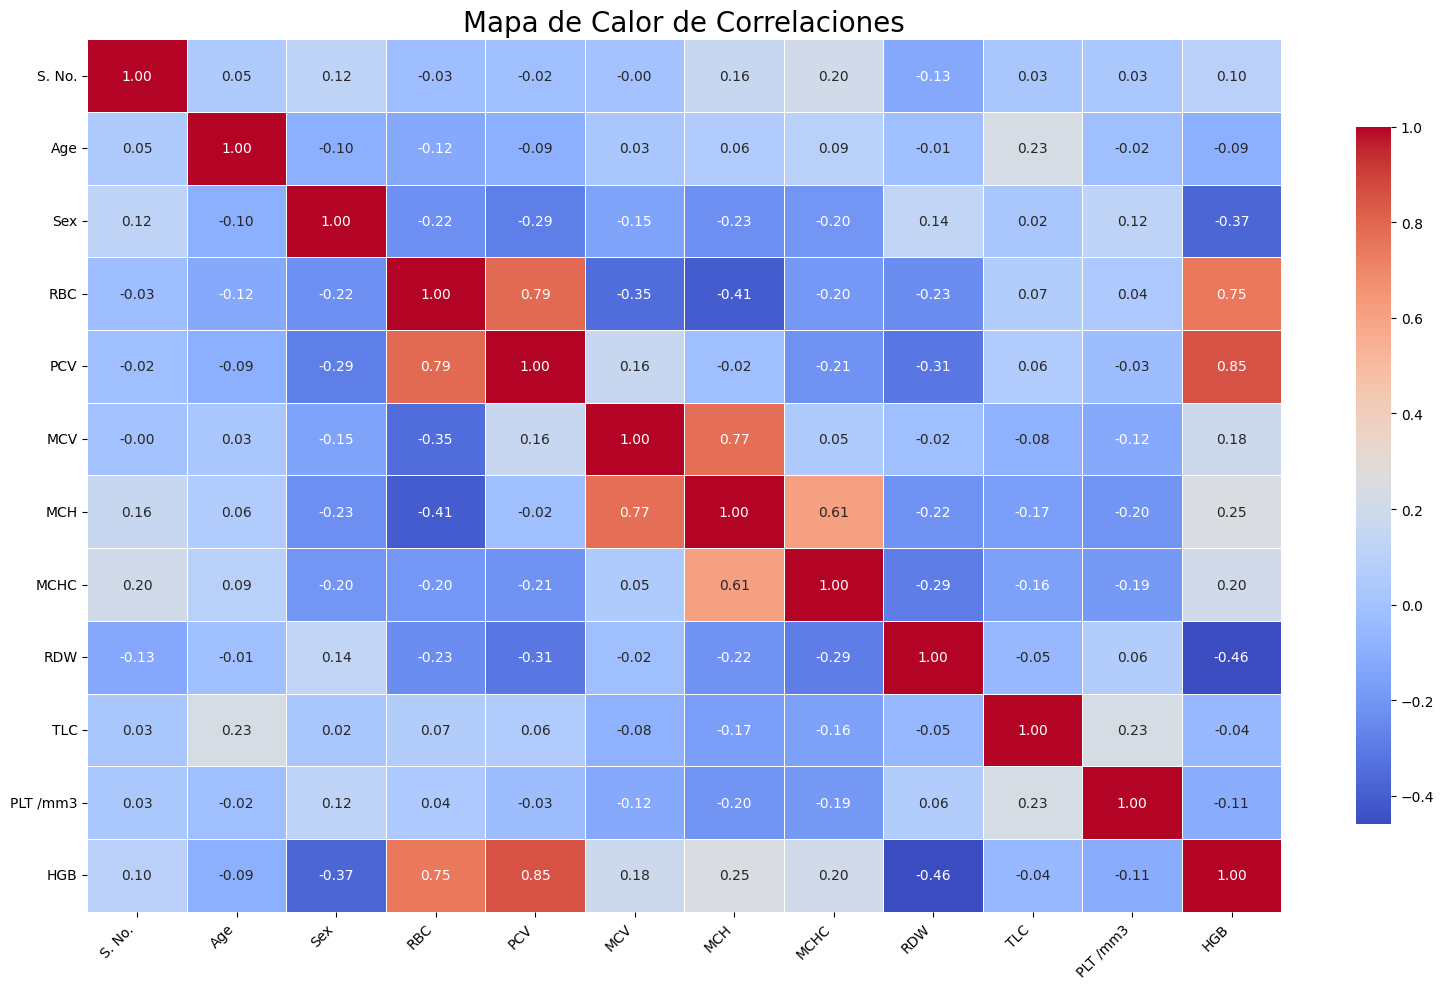

In [11]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(16, 10))  # Puedes ajustar el tamaño según tus necesidades

# Crear el mapa de calor de la matriz de correlación
sns.heatmap(dataset_copy.corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f",
            cbar_kws={"shrink": .8})

# Configurar el título y el tamaño de la fuente
plt.title('Mapa de Calor de Correlaciones', fontsize=20)
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mayor legibilidad
plt.yticks(rotation=0)  # Mantener etiquetas del eje y horizontales

# Ajustar el diseño para que todos los elementos sean visibles
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [12]:
# Separar los datos en variables independientes (X) y dependientes (y)
X = dataset['RBC'].values.reshape(-1, 1)
y = dataset['PCV'].values

In [13]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Crear el modelo de regresión lineal
modelo = LinearRegression()

In [15]:
# Entrenar el modelo
modelo.fit(X_train, y_train)

LinearRegression()

In [16]:
# Coeficientes de regresión
coeficientes = modelo.coef_
intercepto = modelo.intercept_
print(f"Coeficiente de regresión: {coeficientes}")
print(f"Intercepto: {intercepto}")

Coeficiente de regresión: [6.66264334]
Intercepto: 8.442259912826493


In [17]:
# Predecir los valores
y_pred = modelo.predict(X_test)

# Calcular R cuadrada
r_cuadrada = r2_score(y_test, y_pred)
print(f"R cuadrada: {r_cuadrada}")

R cuadrada: 0.5408825878808539


In [18]:
# Mostrar los datos de la regresión
print("Datos de la regresión:")
df_regresion = pd.DataFrame({'Actual': y_test, 'Predicción': y_pred})
print(df_regresion)

Datos de la regresión:
    Actual  Predicción
0     31.7   35.825724
1     33.7   40.889333
2     44.5   42.888126
3     40.1   35.759098
4     38.2   42.288488
..     ...         ...
68    45.2   42.621620
69    35.0   37.957770
70    24.9   27.697299
71    39.8   39.423551
72    33.2   33.560425

[73 rows x 2 columns]


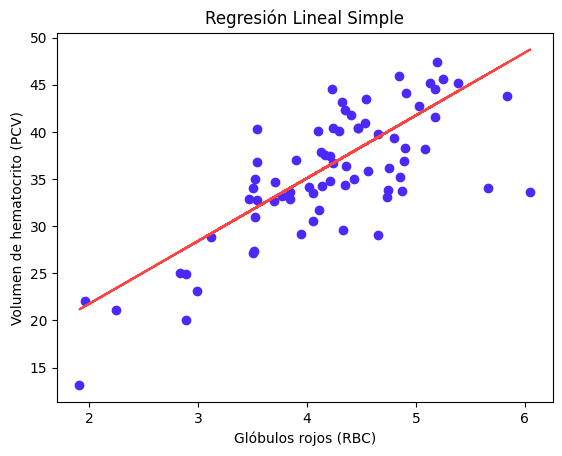

In [19]:
# Graficar
plt.scatter(X_test, y_test, color='#4c28fa')
plt.plot(X_test, y_pred, color='#ff4242')
plt.title('Regresión Lineal Simple')
plt.xlabel('Glóbulos rojos (RBC)')
plt.ylabel('Volumen de hematocrito (PCV)')
plt.show()

In [20]:
print(f"Coeficiente de regresión: {modelo.coef_}")
print(f"Intercepto: {modelo.intercept_}")
print(f"R cuadrada: {r_cuadrada}")

Coeficiente de regresión: [6.66264334]
Intercepto: 8.442259912826493
R cuadrada: 0.5408825878808539


In [21]:
# Calcular el error absoluto entre los valores actuales y las predicciones
mae = mean_absolute_error(y_test, y_pred)

# Calcular el porcentaje de error
porcentaje_error = (mae / y_test.mean()) * 100

print("Error absoluto:", mae)
print("Porcentaje de error:", porcentaje_error)

Error absoluto: 3.5574596202052953
Porcentaje de error: 10.01251310001105


In [22]:
# Verificar los supuestos
# Media cero
residuos = y_test - modelo.predict(X_test)
media_residuos = np.mean(residuos)
print("Media de los residuos:", media_residuos)

# También puedes calcular el error cuadrático medio para evaluar el ajuste del modelo
mse = mean_squared_error(y_test, modelo.predict(X_test))
print("Error Cuadrático Medio:", mse)

Media de los residuos: -0.9326452830408724
Error Cuadrático Medio: 20.81231869544947


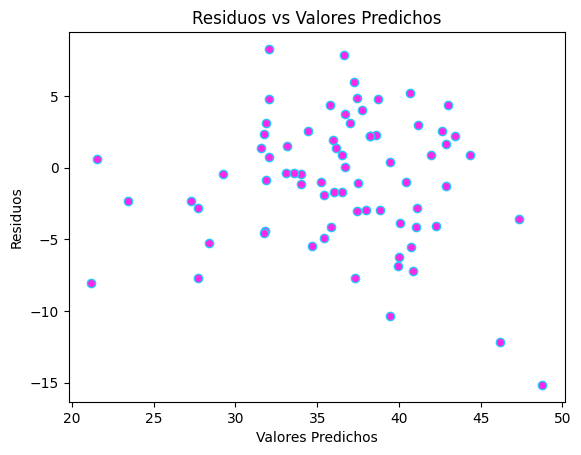

In [23]:
# Homocedasticidad
plt.scatter(modelo.predict(X_test), residuos, c='#fa28e5', edgecolor='#28c6fa')
plt.xlabel("Valores Predichos")
plt.ylabel("Residuos")
plt.title("Residuos vs Valores Predichos")
plt.show()

In [24]:
# PCA: Crear una copia específica para PCA
X_pca = dataset_copy[data_to_plot].copy()

In [25]:
# Escalar los datos para PCA
scaler_pca = StandardScaler()
X_pca_scaled = scaler_pca.fit_transform(X_pca)

In [26]:
# Aplicar PCA (manteniendo 2 componentes principales)
pca = PCA(n_components=2)
X_pca_transformed = pca.fit_transform(X_pca_scaled)

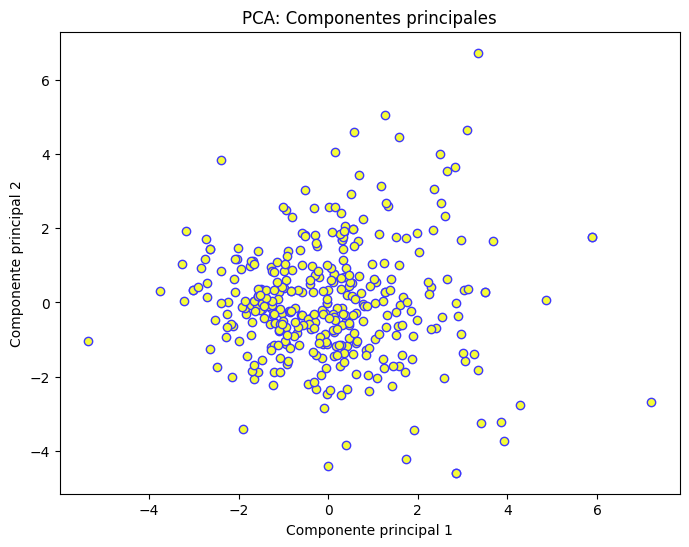

In [27]:
# Visualización de las componentes principales
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_transformed[:, 0], X_pca_transformed[:, 1], c='#f5fc38', edgecolor='#3e38fc')
plt.title('PCA: Componentes principales')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()

In [28]:
# Seleccionar las columnas 'HGB' y 'PCV' del dataset
X = dataset_copy[['HGB', 'PCV']]

In [29]:
# 2. Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
# 3. Aplicar KMeans para agrupar los datos (ajustar número de clusters si es necesario)
kmeans_model = KMeans(n_clusters=2)  # Puedes ajustar el número de clusters
kmeans_model.fit(X_scaled)

KMeans(n_clusters=2)

In [31]:
# 4. Obtener las etiquetas de los clusters predichos
clusters = kmeans_model.predict(X_scaled)

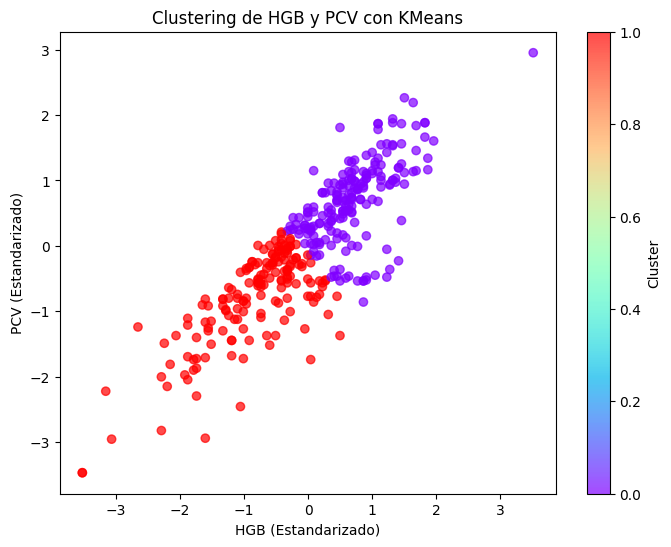

In [32]:
# 5. Graficar los clusters usando 'HGB' y 'PCV'
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='rainbow', alpha=0.7)
plt.title("Clustering de HGB y PCV con KMeans")
plt.xlabel("HGB (Estandarizado)")
plt.ylabel("PCV (Estandarizado)")
plt.colorbar(label="Cluster")
plt.show()

In [33]:
# Probar con diferentes números de clusters y graficar los resultados
clusters_range = [2, 3, 4, 5]
plt.figure(figsize=(15,10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

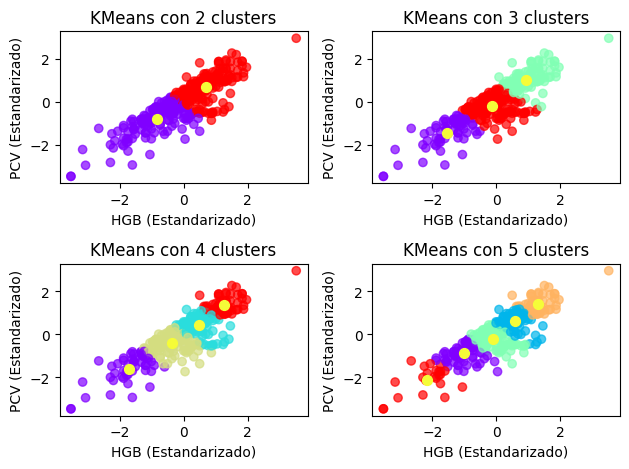

In [34]:
for i, k in enumerate(clusters_range, 1):
    # Aplicar KMeans con k clusters
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    kmeans_model.fit(X_scaled)
    clusters = kmeans_model.predict(X_scaled)
    centroids = kmeans_model.cluster_centers_  # Obtener los centroides
    
    # Graficar los clusters y los centroides
    plt.subplot(2, 2, i)  # Subgráfico
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='rainbow', alpha=0.7)
    plt.scatter(centroids[:, 0], centroids[:, 1], s=50, c='#f5fc38', marker='o')  # Centroides
    plt.title(f"KMeans con {k} clusters")
    plt.xlabel("HGB (Estandarizado)")
    plt.ylabel("PCV (Estandarizado)")

plt.tight_layout()
plt.show()

In [35]:
# Asegúrate de que estas columnas son las que vas a usar para el clustering
X_knn_columns = ['RBC', 'PCV', 'MCV', 'MCH', 'MCHC', 'RDW', 'TLC', 'PLT /mm3', 'HGB']

In [36]:
# Crear el dataset con esas columnas
X_knn_data = dataset_copy[X_knn_columns]

In [37]:
# Escalar los datos antes de aplicar KMeans
scaler_knn = StandardScaler()
X_knn_scaled = scaler_knn.fit_transform(X_knn_data)  # Escalar el dataset seleccionado

In [38]:
# Inicializar el modelo KMeans con 2 clusters (ajusta el número según sea necesario)
kmeans_knn_model = KMeans(n_clusters=2, random_state=42)

In [39]:
# Ajustar el modelo a los datos escalados
kmeans_knn_model.fit(X_knn_scaled)

KMeans(n_clusters=2, random_state=42)

In [40]:
# Obtener las etiquetas predichas de los clusters
kmeans_clusters = kmeans_knn_model.labels_  # Las etiquetas de clusters asignadas por KMeans

In [41]:
# Mostrar las primeras predicciones de clusters
print("Clustering con KMeans:")
print(kmeans_clusters[:10])

Clustering con KMeans:
[0 1 1 0 1 1 1 1 1 1]


In [42]:
# Graficar los clusters en el espacio reducido con PCA
plt.figure(figsize=(8,6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [43]:
# Realiza PCA para reducir las dimensiones a 2 componentes
pca_knn = PCA(n_components=2)
X_knn_pca = pca_knn.fit_transform(X_knn_scaled)

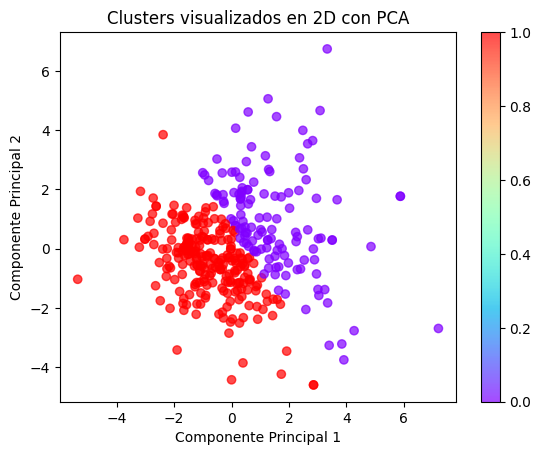

In [44]:
# Graficar los puntos, asegurando que estás accediendo correctamente a las columnas
plt.scatter(X_knn_pca[:, 0], X_knn_pca[:, 1], c=kmeans_clusters, cmap='rainbow', alpha=0.7)

plt.title("Clusters visualizados en 2D con PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar()
plt.show()

In [45]:
# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [46]:
# Aplicar DBSCAN
dbscan_model = DBSCAN(eps=0.5, min_samples=5)  # Ajusta eps y min_samples según tu análisis
dbscan_clusters = dbscan_model.fit_predict(X_scaled)

In [47]:
# Reducir la dimensionalidad a 2D usando PCA para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [48]:
# Identificar los clusters y los "outliers"
unique_labels = np.unique(dbscan_clusters)
n_clusters = len(unique_labels) - (1 if -1 in dbscan_clusters else 0)
n_outliers = list(dbscan_clusters).count(-1)

print(f"Número de clusters encontrados: {n_clusters}")
print(f"Número de outliers encontrados: {n_outliers}")

Número de clusters encontrados: 1
Número de outliers encontrados: 9


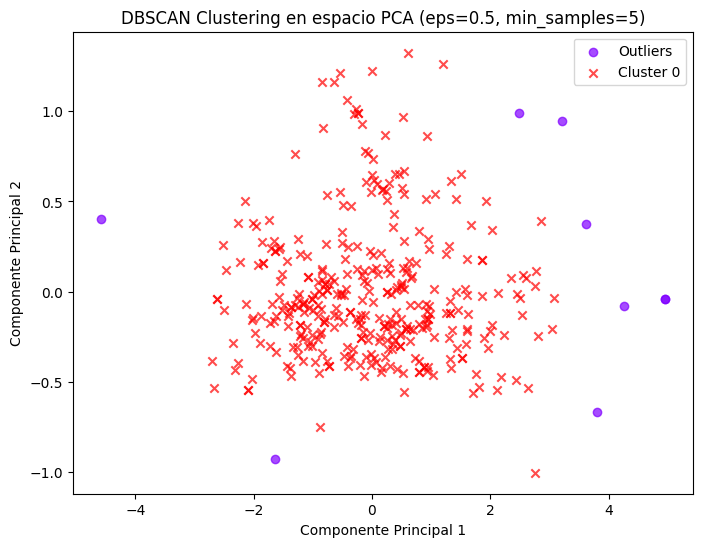

In [49]:
# Graficar los clusters en el espacio reducido a 2D
plt.figure(figsize=(8,6))
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    if label == -1:  # Outliers
        marker = 'o'
        label_name = 'Outliers'
    else:
        marker = 'x'
        label_name = f'Cluster {label}'
    
    mask = (dbscan_clusters == label)
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], c=[color], marker=marker, label=label_name, alpha=0.7)

plt.title(f"DBSCAN Clustering en espacio PCA (eps=0.5, min_samples=5)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.show()